# Tarefa 2 - Decision Tree Classifier para o Hippocampus

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
data_treino = pd.read_csv('./data_mod_hippo/dataset_treino.csv', na_filter=False)
data_teste = pd.read_csv('./data_mod_hippo/dataset_teste.csv', na_filter=False)

In [68]:
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2023 entries, diagnostics_Image-original_Mean to com_z
dtypes: float64(2014), int64(8), object(1)
memory usage: 4.7+ MB


In [69]:
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 2022 entries, diagnostics_Image-original_Mean to com_z
dtypes: float64(2012), int64(10)
memory usage: 1.5 MB


## Conversão de dados do tipo 64 para 32

In [70]:
float_features = data_treino.select_dtypes(include='float')
int_features = data_treino.select_dtypes(include='int')

data_treino[float_features.columns] = data_treino[float_features.columns].astype(np.float32)
data_treino[int_features.columns] = data_treino[int_features.columns].astype(np.int32)
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2023 entries, diagnostics_Image-original_Mean to com_z
dtypes: float32(2014), int32(8), object(1)
memory usage: 2.4+ MB


In [71]:
float_features = data_teste.select_dtypes(include='float')
int_features = data_teste.select_dtypes(include='int')

data_teste[float_features.columns] = data_teste[float_features.columns].astype(np.float32)
data_teste[int_features.columns] = data_teste[int_features.columns].astype(np.int32)
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 2022 entries, diagnostics_Image-original_Mean to com_z
dtypes: float32(2012), int32(10)
memory usage: 790.0 KB


## Split dos Dados

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_treino = data_treino.drop(columns=['Transition'])
y_treino = data_treino['Transition']

X_teste = data_teste

X_train, X_test, y_train, y_test = train_test_split(X_treino, y_treino, test_size=0.30, random_state=2023)

model = DecisionTreeClassifier(random_state=2023)
model.fit(X_treino, y_treino)
feature_importances = model.feature_importances_

features_to_drop = []
for feature, importance in zip(X_train.columns, feature_importances):
    #print(f"{feature}: {importance}")

    if importance == 0:
        features_to_drop.append(feature)
print(len(features_to_drop))

X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)
# Remover as mesmas variáveis de X_treino e X_teste, se necessário
X_treino = X_treino.drop(columns=features_to_drop)  # errors='ignore' lida com colunas ausentes
X_teste = X_teste.drop(columns=features_to_drop)

#X_train.info()
#X_treino.info()
#X_test.info()
#X_teste.info()

1962


## Grid Search

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....criterion=gini, splitter=best;, score=0.349 total time=   0.0s
[CV 2/5] END .....criterion=gini, splitter=best;, score=0.256 total time=   0.0s
[CV 3/5] END .....criterion=gini, splitter=best;, score=0.419 total time=   0.0s
[CV 4/5] END .....criterion=gini, splitter=best;, score=0.381 total time=   0.0s
[CV 5/5] END .....criterion=gini, splitter=best;, score=0.476 total time=   0.0s
[CV 1/5] END ...criterion=gini, splitter=random;, score=0.326 total time=   0.0s
[CV 2/5] END ...criterion=gini, splitter=random;, score=0.326 total time=   0.0s
[CV 3/5] END ...criterion=gini, splitter=random;, score=0.326 total time=   0.0s
[CV 4/5] END ...criterion=gini, splitter=random;, score=0.381 total time=   0.0s
[CV 5/5] END ...criterion=gini, splitter=random;, score=0.381 total time=   0.0s
[CV 1/5] END ..criterion=entropy, splitter=best;, score=0.256 total time=   0.0s
[CV 2/5] END ..criterion=entropy, splitter=best;,

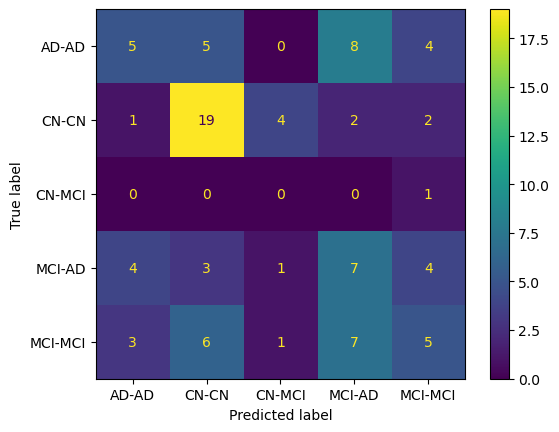

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Definir o modelo de Decision Tree e a grade de parâmetros
dt = DecisionTreeClassifier(random_state=2023)

param_grid_dt = {
    'criterion': ['gini', 'entropy'],         # Função para medir a qualidade da divisão
    'splitter': ['best', 'random']        # Número mínimo de amostras em uma folha
}

# Configurar o GridSearchCV com o modelo de Decision Tree
grid_searchDT = GridSearchCV(dt, param_grid_dt, cv=5, refit=True, verbose=3)
grid_searchDT.fit(X_train, y_train)

# Previsão nos dados de teste usando o melhor estimador encontrado
grid_predictionDT = grid_searchDT.predict(X_test)

# Resultados
print("Best estimator: ", grid_searchDT.best_estimator_)

print(classification_report(y_test, grid_predictionDT))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionDT)

plt.show()

## Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=2023)
dtc.fit(X_treino, y_treino)
predictionDTC = dtc.predict(X_teste)

In [47]:
with open('results_DTC.csv', 'w') as results:
    results.write('RowId,Result\n')
    i = 1
    for p in predictionDTC:
        results.write(f'{i},{p}\n')
        i+=1